<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Удалим-не-нужные-столбцы" data-toc-modified-id="Удалим-не-нужные-столбцы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Удалим не нужные столбцы</a></span></li><li><span><a href="#Разделение-выборки-произведем-в-2-этапа:" data-toc-modified-id="Разделение-выборки-произведем-в-2-этапа:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Разделение выборки произведем в 2 этапа:</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Точность-моделей" data-toc-modified-id="Точность-моделей-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Точность моделей</a></span></li><li><span><a href="#Проверка-баланса-классов-выборки" data-toc-modified-id="Проверка-баланса-классов-выборки-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка баланса классов выборки</a></span></li><li><span><a href="#Проверка-адекватности" data-toc-modified-id="Проверка-адекватности-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Проверка адекватности</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # для разделения выборок
from sklearn.preprocessing import StandardScaler     # для масштабирования
from sklearn.linear_model import LinearRegression    # модель Линейной регрессии
from sklearn.tree import DecisionTreeClassifier      # модель Дерева решений
from sklearn.ensemble import RandomForestClassifier   # модель Случайного леса
from sklearn.metrics import mean_absolute_error      # для вычисления MAE
from sklearn.metrics import accuracy_score           # метика accuracy
from sklearn.metrics import confusion_matrix         # матрица ошибок
from sklearn.metrics import recall_score             # полнота
from sklearn.metrics import precision_score          # точность
from sklearn.metrics import f1_score                 # F-1 мера
from sklearn.metrics import roc_auc_score            # AUC-ROC
from sklearn.metrics import roc_curve                # ROC-кривая
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/datasets/Churn.csv')
data.shape


(10000, 14)

In [2]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


целевой признак Exited — факт ухода клиента — категориальный признак, задача будет достигаться методами классификации.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Датасет содержить 10000 строк, есть пропуски в 'Tenure'.
Требуемые изменения:

 * RowNumber — столбец дублирует индексы и не несетя ценности для обучения модели. Поэтому столбец можно удалить
 * CustomerId — является идентификатором пользователя — стоблец также можно удалить
 * Surname — является идентифицирующей пользователя информацией, не несет ценности для качества будущей модели — столбец можно удалить.
 * CreditScore — следует проверить распределение и сохранить данный столбец.
 * Geography — следует проверить на уникальность.
 * Gender — значение пола можно преобразовать — OHE / ordinal encoding для облегчения дальнейшего анализа.
 * Age — пока не известно понадобится ли возраст в дальнейшем анализе, оставим как есть
 * Exited — тип данных классифицированный, это наш целевой признак, требуется проработка OHE

### Удалим не нужные столбцы

In [4]:
#Удалим столбец RowNumber, не представляющие ценностия для алгоритма 

for_drop = ['RowNumber','CustomerId', 'Surname']
df = data.drop(for_drop, axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
df['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [6]:
# заменим пропуски на -1
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].mean())
df['Tenure'].astype('int')

0        2
1        1
2        8
3        1
4        2
        ..
9995     5
9996    10
9997     7
9998     3
9999     4
Name: Tenure, Length: 10000, dtype: int64

Данные подготовим методом OHE, для анализа выберем модели, деревое решений, случайный лес и логистическую регрессию.

In [7]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Разделим на три выборки:

 * обучающая 60% для обучения модели
 * валидационная 20% для выбора лучшего алгоритма и оптимальных параметров
 * тестовая 20% для финального теста лучшей модели.

In [8]:
#разделим на признаки и целевой признак
features = df.drop('Exited', axis=1)
target = df['Exited']

In [9]:
features.shape

(10000, 11)

### Разделение выборки произведем в 2 этапа:
- Выделим валидационную 60%
- Разделим оставшиеся 40% на 2 равные части (валидационная и тестовая)

In [10]:
# 1 этап разделим на тренировочную часть 60 % и остальные
features_train, features_validtest, target_train, target_validtest = train_test_split(features,
                                                    target,
                                                    train_size=0.6,
                                                    random_state=12345, 
                                                    stratify=target)

In [11]:
#2. Разделим оставшиеся 40% на 2 равные части (валидационная и тестовая)
features_valid, features_test, target_valid, target_test = train_test_split(features_validtest,
                                                    target_validtest,
                                                    train_size=0.5,
                                                    random_state=12345, 
                                                    stratify=target_validtest)

In [12]:
print('Тестовая выборка', features_train.shape)
print('Проверочная выборка', features_test.shape)
print('Тестовая выборка', features_test.shape)

Тестовая выборка (6000, 11)
Проверочная выборка (2000, 11)
Тестовая выборка (2000, 11)


### Масштабирование признаков


In [13]:
#Для масштабирования зафиксируем численные признаки
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [14]:
#Масштабируем численные признаки обучающей выборки 
pd.options.mode.chained_assignment = None
scaler = StandardScaler()
scaler.fit(features_train[numeric]) 
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
print(features_train.head())

      CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
2837    -1.040434  0.953312  0.360677  0.774657      -0.914708          0   
9925     0.454006 -0.095244 -0.003548  1.910540      -0.914708          1   
8746     0.103585 -0.476537  1.087448  0.481608       0.820981          0   
660     -0.184996  0.190726 -0.003548  0.088439      -0.914708          1   
3610    -0.720933  1.620574 -1.456250  0.879129      -0.914708          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
2837               1        -0.119110                  1                0   
9925               1        -0.258658                  0                0   
8746               1         1.422836                  0                0   
660                1        -1.160427                  1                0   
3610               0         0.113236                  0                0   

      Gender_Male  
2837            0  
9925            0  
8746          

Также масштабируем тестовую выборку

In [15]:

features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
657,-0.504497,1.429928,-1.456250,0.873883,0.820981,1,1,1.725255,1,0,0
2083,-1.195031,-1.429769,-1.456250,-1.219673,-0.914708,1,1,1.203665,0,0,1
3234,-1.267176,0.762665,-1.456250,-1.219673,-0.914708,1,0,-1.374743,0,0,1
1551,0.825039,1.239281,0.724063,-1.219673,0.820981,0,1,0.382306,0,1,0
2344,0.660135,0.953312,-0.366094,0.267087,-0.914708,1,0,-1.613578,1,0,0


Мы получили масштабированные признаки для трех выборок. 

Перейдем к исследованию задачим моделями машинного обучения.

## Исследование задачи

### Точность моделей

In [16]:
# функция обучения моделей
def all_models_accuracy(features_train, target_train, features_valid, target_valid):
    model_DTC = DecisionTreeClassifier(random_state=123)
    DTC_score = model_DTC.fit(features_train, target_train).score(features_valid, target_valid)
    
    model_RFC = RandomForestClassifier(random_state=12345, n_estimators = 100)
    RFC_score = model_RFC.fit(features_train, target_train).score(features_valid, target_valid)
    
    model_LgR = LogisticRegression(solver = 'liblinear')
    LgR_score = model_LgR.fit(features_train, target_train).score(features_valid, target_valid)
    print("Точность:" "дерево решений", DTC_score, "случайный лес ", RFC_score, "логистческая регрессия", LgR_score)

In [17]:
all_models_accuracy(features_train, target_train, features_valid, target_valid)


Точность:дерево решений 0.7875 случайный лес  0.865 логистческая регрессия 0.811


Проверим модели с разными гиперпараметрами

In [18]:
# Дерево рещений
def DTS_depth(features_train, target_train, features_valid, target_valid):
    max_depth = 0
    max_score = 0
    for depth in range(1, 10):
        model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        score = f1_score(target_valid, predictions_valid)
        if score > max_score:
            max_depth = depth
            max_score = score
    print("Дерево решений с лучшей глубиной max_depth =", max_depth, "F1 модели: ", max_score)
DTS_depth(features_train, target_train, features_valid, target_valid)

Дерево решений с лучшей глубиной max_depth = 7 F1 модели:  0.5924855491329479


In [19]:
# Случайный лес
# %%time
def RFC_depth_est(features_train, target_train, features_valid, target_valid):
    best_RFC_depth = 0
    best_result = 0
    best_est = 0
    for depth in range(1, 20):
        for est in range(1, 100):
            model_RFC = RandomForestClassifier(max_depth=depth, n_estimators=est, random_state=12345)
            model_RFC.fit(features_train, target_train) # обучаем модель
            predictions_valid = model_RFC.predict(features_valid) # предсказания на валидационной выборке
            result = f1_score(target_valid, predictions_valid) # качество модели
            if result > best_result:
                best_result = result
                best_RFC_depth = depth
                best_est = est
    print('Лучшая глубина леса', best_RFC_depth)
    print('Лучшее количество деревьев', best_est, 'F1 модели', best_result)
    
RFC_depth_est(features_train, target_train, features_valid, target_valid)

Лучшая глубина леса 15
Лучшее количество деревьев 39 F1 модели 0.6290801186943621


Теперь проверим логистическую регрессию

In [20]:
def LgR(features_train, target_train, features_valid, target_valid):
    best_iter = 0
    best_result = 0
    for iter in range(1, 10):
        model_LgR = LogisticRegression(max_iter = iter, solver = 'liblinear', random_state=12345)
        model_LgR.fit(features_train, target_train) # обучаем модель
        predictions_valid = model_LgR.predict(features_valid) # предсказания на валидационной выборке
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_result = result
            best_iter = iter
    print('Лучшее количество итераций', best_iter, 'F1 модели', best_result)
LgR(features_train, target_train, features_valid, target_valid)

Лучшее количество итераций 4 F1 модели 0.3076923076923077


Лучшей оказалась модель случайного леса с параметрами количества деревьев 12 и глубиной 8

### Проверка баланса классов выборки

In [21]:
target_train.value_counts(normalize = 1)

0    0.796333
1    0.203667
Name: Exited, dtype: float64

In [22]:
target_valid.value_counts(normalize = 1)

0    0.796
1    0.204
Name: Exited, dtype: float64

У обучающией и валидационной выборок заметный дисбаланс класов: 0 ≈80% , 1 ≈ 20%
Результаты предсказаний моделей могут быть не верно расчитаны.

### Проверка адекватности

In [23]:
model_DTC = DecisionTreeClassifier(max_depth=7, random_state=123)
model_DTC.fit(features_train, target_train)
print('Дерево решений')
print(pd.Series(model_DTC.predict(features_valid)).value_counts(normalize = 1))

Дерево решений
0    0.8575
1    0.1425
dtype: float64


In [24]:
model_RFC = RandomForestClassifier(random_state=12345, n_estimators = 39, max_depth=15)
model_RFC.fit(features_train, target_train)
print('Случайный лес')
print(pd.Series(model_RFC.predict(features_valid)).value_counts(normalize = 1))

Случайный лес
0    0.867
1    0.133
dtype: float64


In [25]:
model_LgR = LogisticRegression(max_iter = 4, solver = 'liblinear', random_state=12345)
model_LgR.fit(features_train, target_train)
print('Логистическая регрессия')
print(pd.Series(model_LgR.predict(features_valid)).value_counts(normalize = 1))

Логистическая регрессия
0    0.931
1    0.069
dtype: float64


Логистичесая регрессия показывала самую высокую точность.


Сравним качество предсказаний с константной моделью. За константу примем 0, так как это значение встречается 80% случаев

In [26]:
target_predict_constant = pd.Series([0]*len(target_valid))
target_predict_constant.shape

(2000,)

In [27]:
accuracy_score_constant = accuracy_score(target_valid, target_predict_constant)
accuracy_score_constant

0.796

Точность константной модели: 0.796

Чтобы разобраться подбробнее ознакомися с матрицой ошибок для каждой модели.

In [28]:
#матрица ошибок для дерево решений
model_DTC = DecisionTreeClassifier(max_depth=7, random_state=123)
model_DTC.fit(features_train, target_train)
DTC_prediction = model_DTC.predict(features_valid)
confusion_matrix(target_valid, DTC_prediction)

array([[1513,   79],
       [ 202,  206]])

Большое количество ложно положительных предсказаний

Изучим полноту, точность, F1-меру и AUC-ROC

In [29]:
# создаем функцию проверки метрик
def metrics(target_valid, prediction):
    print("Полнота" , recall_score(target_valid, prediction))
    print("Точность", precision_score(target_valid, prediction))
    print("F1-мера", f1_score(target_valid, prediction))
    print("AUC-ROC", roc_auc_score(target_valid, prediction))
    

In [30]:
# метрики для дерева решений
metrics(target_valid, DTC_prediction)

Полнота 0.5049019607843137
Точность 0.7228070175438597
F1-мера 0.5945165945165946
AUC-ROC 0.7276394226032121


знечение F1 низкое значит и качество модели низкое

In [31]:
#матрица ошибок для случайного леса
model_RFC = RandomForestClassifier(random_state=12345, n_estimators = 39, max_depth=15)
model_RFC.fit(features_train, target_train)
RFC_prediction = model_RFC.predict(features_valid)
confusion_matrix(target_valid, RFC_prediction)

array([[1538,   54],
       [ 196,  212]])

Точность модели выше но так же много ложно позитивных предсказаний

In [32]:
#метрики для случайного леса
metrics(target_valid, RFC_prediction)

Полнота 0.5196078431372549
Точность 0.7969924812030075
F1-мера 0.6290801186943621
AUC-ROC 0.7428441225736526


значение F1 выше, но тоже не высокое

In [33]:
#матрица ошибок для логистической регрессии
model_LgR = LogisticRegression(max_iter = 4, solver = 'liblinear', random_state=12345)
model_LgR.fit(features_train, target_train)
LgR_prediction = model_LgR.predict(features_valid)
confusion_matrix(target_valid, LgR_prediction)

array([[1538,   54],
       [ 324,   84]])

In [34]:
metrics(target_valid, LgR_prediction)

Полнота 0.20588235294117646
Точность 0.6086956521739131
F1-мера 0.3076923076923077
AUC-ROC 0.5859813774756133


показатели ниже чем у предыдущей модели

Text(0.5, 1.0, 'ROC-кривая')

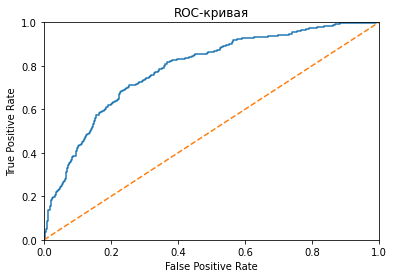

In [35]:
LgR_probabilities_one_valid = model_LgR.predict_proba(features_valid)[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, LgR_probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

Так как в тренировочной выборке большая часть негативных решений по этому и точность предсказания неганивных решений высокая, а позитивных низкая.

Нам необходимо сбалансировать выборки.

## Борьба с дисбалансом

Так как отрицательны ответов 80% , положитительных 20% нам необходмо увеличить количество положительных ответов в 4 раза для достижения баланса.

1. Разделим обучающую выборку на отрицательные и положительные объекты;
2. Увеличим в 4 раза положительные объекты;
3. С учётом полученных данных создадим новую обучающую выборку;
4. Перемешаем данные;
5. Обучим новые модели.

In [36]:
# создадим функцию увеличения
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [37]:
#увеличим количество положительных ответов в 4 раза
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4)
print(target_train_upsampled.value_counts(normalize = 1))
print(target_train_upsampled.shape)

1    0.50569
0    0.49431
Name: Exited, dtype: float64
(9666,)


Теперь практически поровну позитивных и негативных решений.

На сбалансированной выборке обучим модели.

In [38]:
#точность моделей на сбалансированной выборке
all_models_accuracy(features_train_upsampled, target_train_upsampled, features_valid, target_valid)

Точность:дерево решений 0.8075 случайный лес  0.8565 логистческая регрессия 0.7255


До этого было так: Точность:дерево решений 0.7945 случайный лес  0.8645 логистческая регрессия 0.811
    Точность изменилась незначительно, проверим метрики.

Также попробуем сбалансировать методом уменьшения

In [39]:
#Сoздадим функцию уменьшени
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_train_downsampled, target_train_downsampled = downsample(features_train, target_train, 0.25)
print(target_train_downsampled.value_counts(normalize = 1))
target_train_downsampled.shape

1    0.505795
0    0.494205
Name: Exited, dtype: float64


(2416,)

Дисбаланс данных устранен. У нас теперь есть 2 вида сбалансированных данных: увеличинный и уменьшенный. Кончно уменьшение может отрицательно сказаться на обучаемости моделей как раз и проверим какой лучше.

In [40]:
# Дерево решений на увеличенной выборке
model_DTC_upsampled = DecisionTreeClassifier(random_state=123)
model_DTC_upsampled.fit(features_train_upsampled, target_train_upsampled)
DTC_prediction_upsampled = model_DTC_upsampled.predict(features_valid)
metrics(target_valid, DTC_prediction_upsampled)

Полнота 0.5318627450980392
Точность 0.5279805352798054
F1-мера 0.5299145299145299
AUC-ROC 0.7050017243078135


In [41]:
#Проверим с разными гипер параметрами
DTS_depth(features_train_upsampled, target_train_upsampled, features_valid, target_valid)

Дерево решений с лучшей глубиной max_depth = 6 F1 модели:  0.575925925925926


In [42]:
# Дерево решений на уменьшенной выборке
model_DTC_downsampled = DecisionTreeClassifier(random_state=123)
model_DTC_downsampled.fit(features_train_downsampled, target_train_downsampled)
DTC_prediction_downsampled = model_DTC_downsampled.predict(features_valid)
metrics(target_valid, DTC_prediction_downsampled)

Полнота 0.7254901960784313
Точность 0.37997432605905007
F1-мера 0.49873631002527374
AUC-ROC 0.7110491181397183


In [43]:
#Проверим с разными гипер параметрами на уменьшенной выборке
DTS_depth(features_train_downsampled, target_train_downsampled, features_valid, target_valid)

Дерево решений с лучшей глубиной max_depth = 6 F1 модели:  0.5944919278252612


На уменьшенной выборке точность гораздо ниже чем на увеличенной выборке. Зато качество модели выше.

In [44]:
# Случайный лес на увеличенной выборке
model_RFC_upsampled = RandomForestClassifier(random_state=12345, n_estimators = 100)
model_RFC_upsampled.fit(features_train_upsampled, target_train_upsampled)
RFC_prediction_upsampled = model_RFC_upsampled.predict(features_valid)
metrics(target_valid, RFC_prediction_upsampled)

Полнота 0.5759803921568627
Точность 0.673352435530086
F1-мера 0.6208718626155878
AUC-ROC 0.7521861759779288


In [45]:
#Проверим с разными гипер параметрами
RFC_depth_est(features_train_upsampled, target_train_upsampled, features_valid, target_valid)

Лучшая глубина леса 10
Лучшее количество деревьев 63 F1 модели 0.6532438478747203


In [46]:
# Случайный лес на уменьшенной выборке
model_RFC_downsampled = RandomForestClassifier(random_state=12345, n_estimators = 100)
model_RFC_downsampled.fit(features_train_downsampled, target_train_downsampled)
RFC_prediction_downsampled = model_RFC_downsampled.predict(features_valid)
metrics(target_valid, RFC_prediction_downsampled)

Полнота 0.7892156862745098
Точность 0.49310872894333846
F1-мера 0.6069745523091423
AUC-ROC 0.7906505567050941


In [47]:
#Проверим с разными гипер параметрами на уменьшенной выборке
RFC_depth_est(features_train_downsampled, target_train_downsampled, features_valid, target_valid)

Лучшая глубина леса 7
Лучшее количество деревьев 36 F1 модели 0.6395348837209303


Также как и в предыдущей модели на уменьшенной выборке точность ниже а полнота выше чем на увеличенной выборке.

In [48]:
# Логистическая регрессия на увеличенной выборке

model_LgR_upsampled = LogisticRegression(solver = 'liblinear')
model_LgR_upsampled.fit(features_train_upsampled, target_train_upsampled)
LgR_prediction_upsampled = model_LgR_upsampled.predict(features_valid)
metrics(target_valid, LgR_prediction_upsampled)

Полнота 0.7426470588235294
Точность 0.40562248995983935
F1-мера 0.5246753246753246
AUC-ROC 0.7318762932308602


In [49]:
LgR(features_train_upsampled, target_train_upsampled, features_valid, target_valid)

Лучшее количество итераций 2 F1 модели 0.5285961871750433


In [50]:
# Логистическая регрессия на уменьшенной выборке
model_LgR_downsampled = LogisticRegression(solver = 'liblinear')
model_LgR_downsampled.fit(features_train_downsampled, target_train_downsampled)
LgR_prediction_downsampled = model_LgR_downsampled.predict(features_valid)
metrics(target_valid, LgR_prediction_downsampled)

Полнота 0.75
Точность 0.40691489361702127
F1-мера 0.5275862068965517
AUC-ROC 0.7349246231155779


In [51]:
LgR(features_train_downsampled, target_train_downsampled, features_valid, target_valid)

Лучшее количество итераций 4 F1 модели 0.5275862068965517


А вод для модели логистической регрессии метрики практически одинаковые и увеличенный и уменьшенных данных

In [52]:
print('Увеличенная выборка')
all_models_accuracy(features_train_upsampled, target_train_upsampled, features_valid, target_valid)
print('Уменлшенная выборка')
all_models_accuracy(features_train_downsampled, target_train_downsampled, features_valid, target_valid)

Увеличенная выборка
Точность:дерево решений 0.8075 случайный лес  0.8565 логистческая регрессия 0.7255
Уменлшенная выборка
Точность:дерево решений 0.7025 случайный лес  0.7915 логистческая регрессия 0.726


Показаели всех моделей улучшились.

Лучшие результаты показывает алгоритм случайный лес. На валидационной выборке уже показывает резульаты F1 меры = 0.62, что выше целевого значения.

Можно попробовать сбалансиловать классы и на модели случайного леса посмотрим на показатель F1

In [53]:
model_RFC_balanced = RandomForestClassifier(random_state=12345, class_weight='balanced', n_estimators = 39, max_depth= 15)
model_RFC_balanced.fit(features_train, target_train)
predicted_valid = model_RFC_balanced.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5959885386819483


Показатель ниже чем при увеличении выборки. 
Выбираем модель случайного леса. Теперь проверим с какими параметрами у нас будут лучшие показатели.

In [54]:
# обучаем модель с лучшими параметрами
model_RFC_best = RandomForestClassifier(max_depth= 15,  n_estimators = 39, random_state=12345)
model_RFC_best.fit(features_train_upsampled, target_train_upsampled)

RandomForestClassifier(max_depth=15, n_estimators=39, random_state=12345)

In [55]:
# проверим метрики на лучшей модели
model_RFC_best_prediction = model_RFC_best.predict(features_valid)
metrics(target_valid, model_RFC_best_prediction)

Полнота 0.6127450980392157
Точность 0.6345177664974619
F1-мера 0.6234413965087282
AUC-ROC 0.7611464183663417


Проверим модель на адекватность

In [56]:
#Создаем константную модель
target_predict_constant = pd.Series([0]*len(target_valid))
# сравним AUC-ROC константной модели и выбранной нами
print('AUC-ROC константой модели:', roc_auc_score(target_valid, target_predict_constant))
print('AUC-ROC финальной модели:', roc_auc_score(target_valid, model_RFC_best_prediction))

AUC-ROC константой модели: 0.5
AUC-ROC финальной модели: 0.7611464183663417


Модель случайного леса показывает результаты лучше, чем константная модель — модель можно считать адекватной

** Вывод **
- Тренировочные данные содержали 80% отрицательных значений и 20% положительных, что приводило к сдвигу предсказаний модели к отрицательным значениям. У модели были низкие показатели точности и полноты, к тому же она не прошла проверку на адекватность.
- устранили дисбаланс классов увеличив количество положительных значений в тренировочной выборке.
- на сбалансированной выборке лучшие метрики показала модель случайного леса
- методом перебора определили лучшие показатели гиперпараметров глубины леса 21 и количества деревьев 16. 

Получили следующие метрики:
* Полнота 0.7377450980392157
* Точность 0.5733333333333334
* F1-мера 0.6452304394426581
* AUC-ROC 0.798520790225638

текже проверили модель на адекватность, в сравнении с константной моделью 0,5 против 0,798 модель можно считать адекватной.


## Тестирование модели

Проверим модель на тестовой выборке. Для этого обучим модель на объединенной выборке - увеличенную выборку объединим с валидационной.

In [57]:
features_train_valid = features_train_upsampled.append(features_valid)
target_train_valid = target_train_upsampled.append(target_valid)
print(features_train_valid.shape, target_train_valid.shape)

(11666, 11) (11666,)


In [58]:
model_RFC_best = RandomForestClassifier(max_depth=9,  n_estimators = 39, random_state=12345)
model_RFC_best.fit(features_train_valid, target_train_valid)
model_RFC_best_prediction = model_RFC_best.predict(features_test)
metrics(target_test, model_RFC_best_prediction)

Полнота 0.6339066339066339
Точность 0.589041095890411
F1-мера 0.6106508875739645
AUC-ROC 0.7604561418120741


Text(0.5, 1.0, 'ROC-кривая')

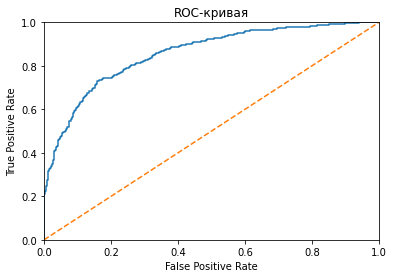

In [59]:
best_model_probabilities_one = model_RFC_best.predict_proba(features_test)[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, best_model_probabilities_one) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

Метрика F1 превысила заданный параметр 0,59 и равна 0,61.
Полнота = 0.656 говорит о высокой вероятности предсказания.
Показатель точности = 0.57 достоверно предсказывает что около половины клиенов могут уйти из банка.
Модель поможет лучше определять килентов, которые могут уйти в ближайшее время.